In [21]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#from pandas_datareader.data import DataReader
import datetime
#import pandas_datareader.data as web

from pandas.plotting import scatter_matrix
%matplotlib inline


In [23]:
!pip install yfinance
import yfinance as yf

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


     ---------------------------------------- 0.0/59.2 kB ? eta -:--:--
     ---------------------------------------- 59.2/59.2 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
     ----- ---------------------------------- 0.6/3.8 MB 17.3 MB/s eta 0:00:01
     -------------- ------------------------- 1.4/3.8 MB 22.1 MB/s eta 0:00:01
     ------------------------------ --------- 2.8/3.8 MB 25.7 MB/s eta 0:00:01
     ------------------------------------ --- 3.5/3.8 MB 20.2 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 20.0 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 20.0 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 20.0 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 20.0 MB/s eta 

In [24]:
start = "2015-9-01"
end = "2021-09-01"

In [25]:
#
start_date = datetime.date(2016,1,1)
end_date = datetime.date(2021,1,1)
(end_date-start_date)


datetime.timedelta(days=1827)

In [26]:
years= (end_date-start_date).days/365
years

5.005479452054795

In [27]:
ticker = ["KOTAKBANK.NS", "HDFCBANK.NS","ICICIBANK.NS"]
data = yf.download(ticker,start,end)
data.head()


[*********************100%***********************]  3 of 3 completed


Adj Close                                 Close               \
           HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS HDFCBANK.NS ICICIBANK.NS   
Date                                                                        
2015-09-01  477.825928   232.541290   611.655212  500.049988   246.318176   
2015-09-02  475.460968   227.306015   606.622559  497.575012   240.772720   
2015-09-03  482.699249   229.022507   624.959656  505.149994   242.590912   
2015-09-04  475.890961   221.212494   604.230652  498.024994   234.318176   
2015-09-07  470.348755   213.788651   598.600098  492.225006   226.454544   

                               High                                   Low  \
           KOTAKBANK.NS HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS HDFCBANK.NS   
Date                                                                        
2015-09-01   613.750000  510.649994   253.136368   647.400024       496.5   
2015-09-02   608.700012  506.975006   251.590912   619.000000       492.5   
2015-09-03   627.099976  507.500000   245.272720   629.950012       499.5   
2015-09-04   606.299988  503.000000   241.000000   623.799988       490.0   
2015-09-07   600.650024  504.899994   237.500000   613.250000       490.0   

                                            Open                            \
           ICICIBANK.NS KOTAKBANK.NS HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS   
Date                                                                         
2015-09-01   243.909088        608.5  510.649994   250.000000   646.799988   
2015-09-02   239.181824        601.0  502.549988   250.909088   617.950012   
2015-09-03   237.909088        605.0  501.149994   244.227264   609.700012   
2015-09-04   231.500000        594.5  501.100006   240.818176   623.799988   
2015-09-07   225.181824        595.0  500.500000   236.409088   605.250000   

                Volume                            
           HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS  
Date                                              
2015-09-01     5234572     17342438      2257583  
2015-09-02     4340844     18825908      1747255  
2015-09-03     3253684     16509187      1835581  
2015-09-04     5702296     21605844      1696206  
2015-09-07     2690870     21698736      1236366

In [28]:
#Bottom 5
data.tail()

Adj Close                                  Close               \
            HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS  HDFCBANK.NS ICICIBANK.NS   
Date                                                                          
2021-08-25  1539.500244   686.927734  1696.178833  1557.400024   691.049988   
2021-08-26  1536.930176   694.631531  1696.478760  1554.800049   698.799988   
2021-08-27  1530.653076   695.575867  1712.519043  1548.449951   699.750000   
2021-08-30  1550.225464   709.393005  1734.805542  1568.250000   713.650024   
2021-08-31  1563.224365   714.760742  1752.644897  1581.400024   719.049988   

                                High                                    Low  \
           KOTAKBANK.NS  HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS  HDFCBANK.NS   
Date                                                                          
2021-08-25  1697.199951  1564.800049   700.450012  1716.699951  1548.000000   
2021-08-26  1697.500000  1571.000000   701.549988  1716.500000  1543.449951   
2021-08-27  1713.550049  1558.650024   700.450012  1723.800049  1545.250000   
2021-08-30  1735.849976  1570.000000   715.000000  1739.550049  1551.599976   
2021-08-31  1753.699951  1583.349976   719.900024  1759.599976  1562.199951   

                                             Open                            \
           ICICIBANK.NS KOTAKBANK.NS  HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS   
Date                                                                          
2021-08-25   687.150024  1694.000000  1552.099976   699.950012  1705.000000   
2021-08-26   690.000000  1688.900024  1550.000000   692.049988  1693.800049   
2021-08-27   689.049988  1695.000000  1552.000000   696.099976  1695.000000   
2021-08-30   700.900024  1715.949951  1555.599976   704.500000  1715.949951   
2021-08-31   709.349976  1739.050049  1563.500000   714.000000  1744.050049   

                Volume                            
           HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS  
Date                                              
2021-08-25     3863987      9535359      2913810  
2021-08-26     5559501     10756731      4382577  
2021-08-27     3191069      9135827      3661315  
2021-08-30     4524583     10797869      2561253  
2021-08-31     6031288     19760246      4492609

Text(0, 0.5, 'Share Price')

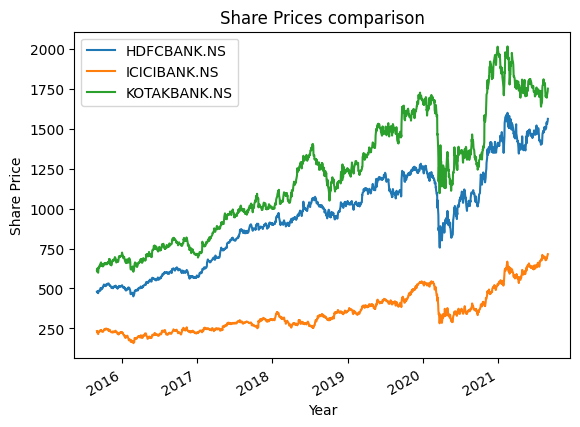

In [29]:
#1 Adj close Plotting = > Current market Situation

data['Adj Close'].plot()
plt.title("Share Prices comparison")
plt.xlabel("Year")
plt.ylabel("Share Price")

Text(0, 0.5, 'Share Price')

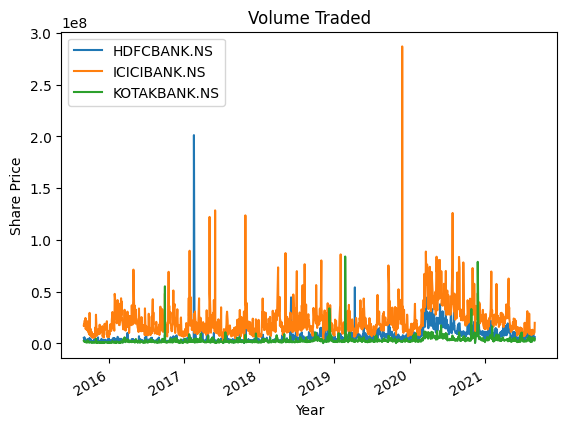

In [30]:
#2 Volume Traded ==> Most Famous Stock ==> Most Preferred Stock==> ICICI Bank then HDFC 
data['Volume'].plot()
plt.title("Volume Traded")
plt.xlabel("Year")
plt.ylabel("Share Price")

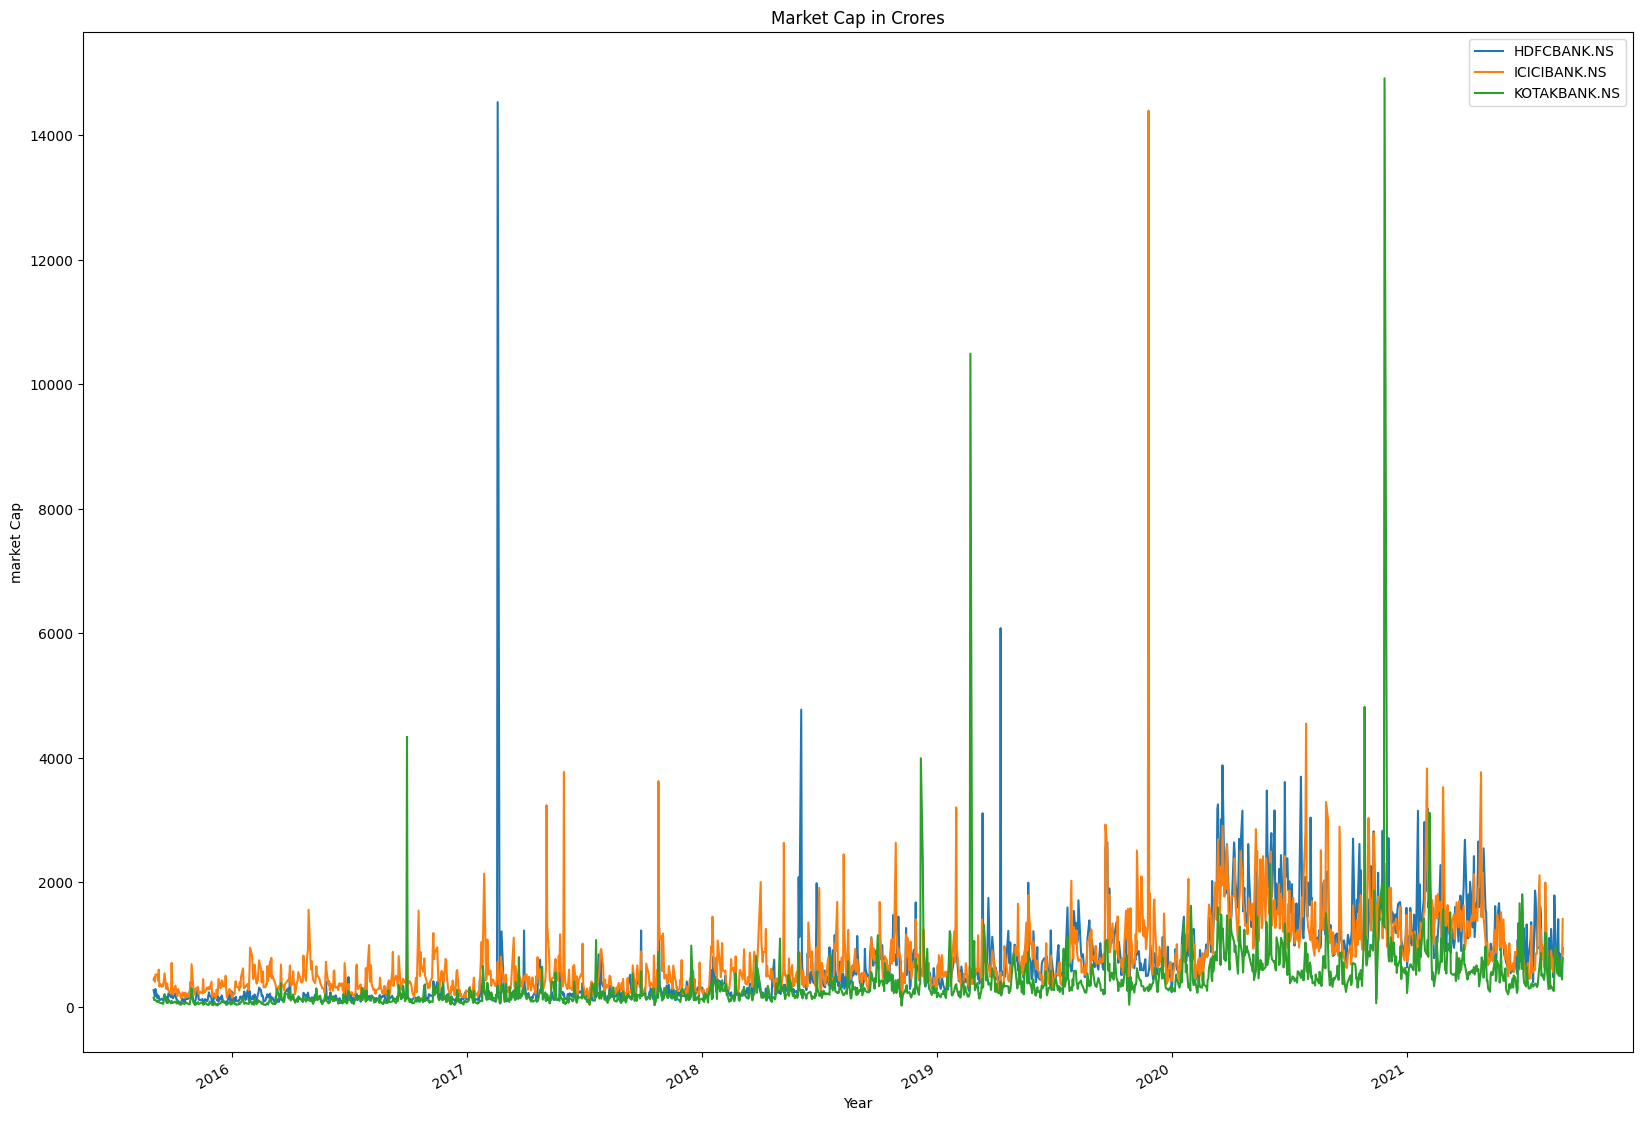

In [31]:
#MarketCAP ==> 1. Blue is HDFC, 2. Orange is ICICI, 3. Green is Kotak

MarketCap = data['Open']*data['Volume']/10**7

MarketCap.plot(label= 'MarketCa', figsize=(20,15))
plt.title("Market Cap in Crores")
plt.xlabel("Year")
plt.ylabel("market Cap")
plt.legend()
plt.show()


In [32]:
#Daily percentage Change
daily_returns2 = data['Adj Close'].pct_change()
daily_returns2*100


,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
Date,,,
2015-09-01,NaN,NaN,NaN
2015-09-02,-0.494942,-2.251331,-0.822793
2015-09-03,1.522371,0.755146,3.022818
2015-09-04,-1.410462,-3.410151,-3.316855
2015-09-07,-1.164596,-3.355978,-0.931855
...,...,...,...
2021-08-25,-0.093010,-0.489602,-0.451643
2021-08-26,-0.166942,1.121486,0.017682
2021-08-27,-0.408418,0.135948,0.945505


<Axes: xlabel='Date'>

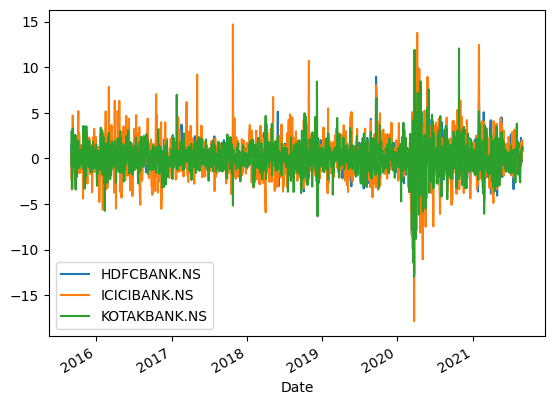

In [33]:
#Volatility= Daily Stock price change percentage
#Inference = ICICI bank is the most volatile
drp = daily_returns2*100
drp.plot()

<Figure size 640x480 with 0 Axes>

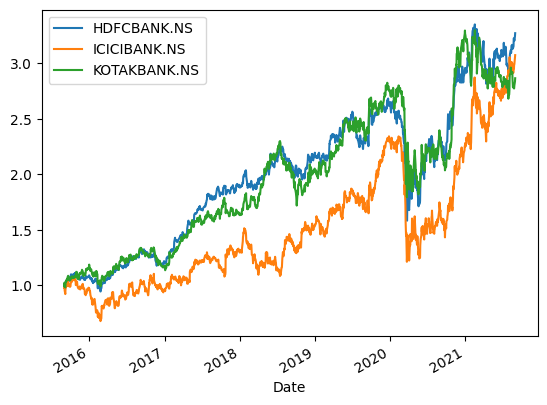

In [34]:
#Cumulative Returns 

fig = plt.figure()
(daily_returns2 + 1).cumprod().plot()
plt.show()
#Hdfc bank is the most volatile



<Figure size 640x480 with 0 Axes>

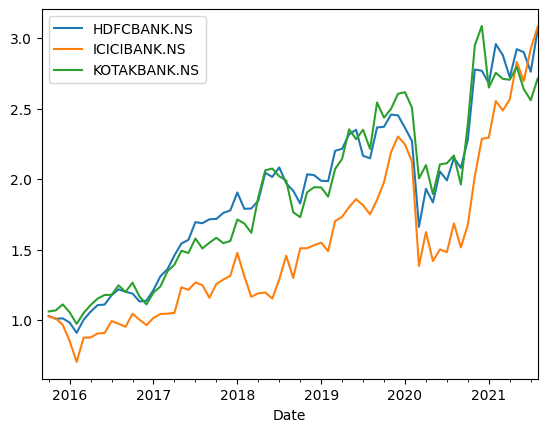

In [35]:
#Performance of stocks(All starting from 1) over time on monthly timeframe

Monthly_returns2 = data['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(Monthly_returns2 + 1).cumprod().plot()

plt.show()

In [36]:
#Correlation between the closing price of Different Stocks 
# Inference = Does Change in one 
data['Adj Close'].corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.934638,0.979040
ICICIBANK.NS,0.934638,1.000000,0.922695
KOTAKBANK.NS,0.979040,0.922695,1.000000


In [37]:
#Correlation between the closing price returns of Different Stocks 
# Inference = Does Change in one stock price have any impact on another stock on daily basis?

daily_returns2.corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.529705,0.632588
ICICIBANK.NS,0.529705,1.000000,0.440279
KOTAKBANK.NS,0.632588,0.440279,1.000000


In [38]:
#Correlation between the closing price returns of Different Stocks 
# Inference = Does Change in one stock price have any impact on another stock on daily basis?

Monthly_returns2.corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.685569,0.775035
ICICIBANK.NS,0.685569,1.000000,0.623099
KOTAKBANK.NS,0.775035,0.623099,1.000000


In [39]:
#Correlation between the Traded Volume of Different Stocks 
# Inference = Does daily volumes have any impact on another stock on daily basis?
# ICICI Bank has some relation with HDFC bank
data['Volume'].corr()

,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
HDFCBANK.NS,1.000000,0.408080,0.275727
ICICIBANK.NS,0.408080,1.000000,0.268321
KOTAKBANK.NS,0.275727,0.268321,1.000000


In [40]:
#Volatility => Single Graph to represent volatilty?

returns = (dataKOTAKBANK.NS['Close']/data.KOTAKBANK.NS['Close'].shift(1))-1

returns.hist(bins= 100, label= "Volatility", alpha =0.5, figsize=(15,7))

plt.legend()
plt.show()

NameError: name 'dataKOTAKBANK' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


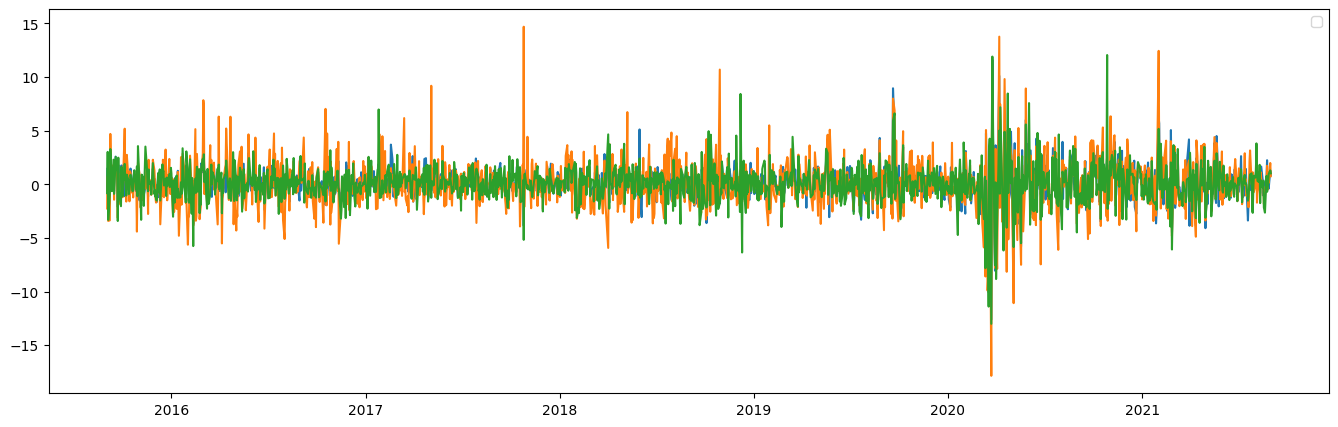

In [41]:
# Daily returns => Volatility (But not clear)
# How to fix the issue of legend(They are not visible)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,2,0.8])
ax1.plot(daily_returns2*100)


plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


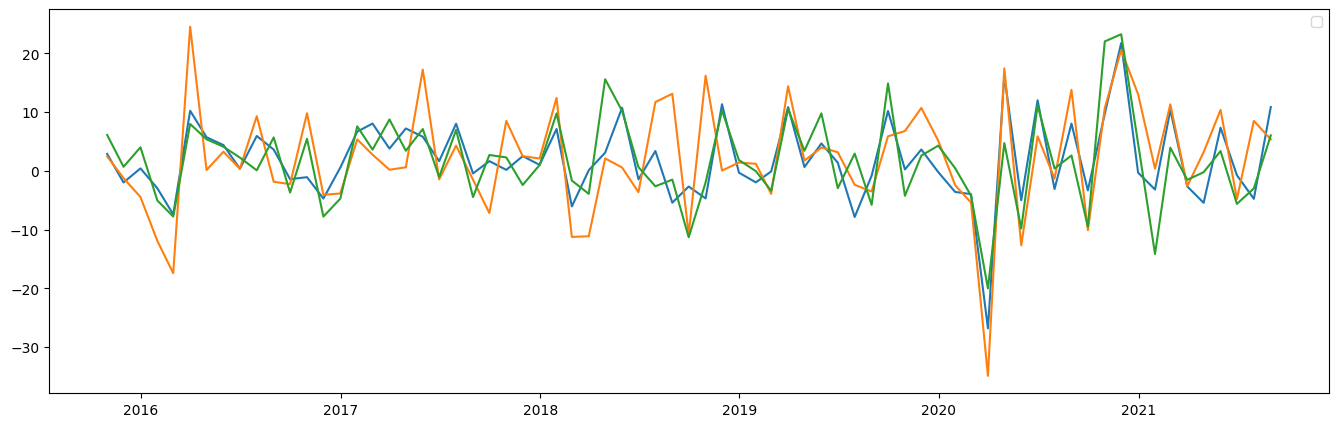

In [42]:
#Monthly Volatility
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,2,0.8])
ax1.plot(Monthly_returns2*100)


plt.legend()
plt.show()

In [43]:
daily_returns2.mean()*100

HDFCBANK.NS     0.091355
ICICIBANK.NS    0.101524
KOTAKBANK.NS    0.086696
dtype: float64

In [44]:
 
 infos = []
 for i in ticker:
    infos.append(yf.Ticker(i).info)

ConnectTimeout: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /ranaroussi/yfinance/main/yfinance/scrapers/yahoo-keys.txt (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001110804F010>, 'Connection to raw.githubusercontent.com timed out. (connect timeout=30)'))

In [ ]:
infos

[{'52WeekChange': 0.5097078,
  'SandP52WeekChange': 0.2525941,
  'address1': 'Bandra Kurla Complex',
  'address2': '27BKC, C 27 G Block Bandra (East)',
  'algorithm': None,
  'annualHoldingsTurnover': None,
  'annualReportExpenseRatio': None,
  'ask': 0,
  'askSize': 0,
  'averageDailyVolume10Day': 2190118,
  'averageVolume': 3650246,
  'averageVolume10days': 2190118,
  'beta': 0.668135,
  'beta3Year': None,
  'bid': 0,
  'bidSize': 0,
  'bookValue': 421.683,
  'category': None,
  'circulatingSupply': None,
  'city': 'Mumbai',
  'companyOfficers': [],
  'country': 'India',
  'currency': 'INR',
  'currentPrice': 2017.8,
  'currentRatio': None,
  'dateShortInterest': None,
  'dayHigh': 2025.5,
  'dayLow': 1985,
  'debtToEquity': None,
  'dividendRate': 0.9,
  'dividendYield': 0.0005,
  'earningsGrowth': -0.047,
  'earningsQuarterlyGrowth': -0.025,
  'ebitda': None,
  'ebitdaMargins': 0,
  'enterpriseToEbitda': None,
  'enterpriseToRevenue': 9.804,
  'enterpriseValue': 4094505254912,
  'e

In [ ]:
fundamentals= ['marketCap','trailingPE','priceToBook','returnOnEquity','profitMargins','operatingMargins','dividendYield','totalDebt','revenueGrowth','earningsGrowth']

#Buy @ 1000, Sell @ 1500
#Gross profit = 500
#EBITDA= earning before ITDA including other expenses like labour, rents
#Ebitda= 300


In [ ]:
df = pd.DataFrame(infos)
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,address1,fax,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
0,400051,Financial Services,73000.0,"Kotak Mahindra Bank Limited, provides banking ...",Mumbai,91 22 6166 0001,India,[],http://www.kotak.com,1,Bandra Kurla Complex,91 22 6713 2403,Banks—Regional,"27BKC, C 27 G Block Bandra (East)",0,0.23809,0,None,0.170,0.31732,None,NaN,none,405885245000,None,NaN,2017.8,-0.047,None,NaN,NaN,NaN,None,NaN,NaN,366781792256,477388996608,417641299968,184.993,INR,...,None,2190118,2009.35,1908.2444,0.9,2008.00,None,2190118,None,None,0.9,1628640000,None,None,1985.00,INR,40.377804,1651848,None,None,None,4001479262208,None,None,3650246,1985.00,0,0,1651848,2077.8,None,None,1308.50,0,False,0.0005,0,2025.5,2017.8,https://logo.clearbit.com/kotak.com
1,400013,Financial Services,123473.0,HDFC Bank Limited provides various banking and...,Mumbai,91 22 6652 1000,India,[],http://www.hdfcbank.com,1,HDFC Bank House,91 22 24960737,Banks—Regional,Senapati Bapat Marg Lower Parel,0,0.40831,0,None,0.155,0.54849,None,1393.0,buy,777974049000,None,1800.0,1687.4,0.135,None,NaN,44.0,1770.32,None,0.16579,2078.0,1223041875968,1725907992576,804006133760,222.313,INR,...,None,5600626,1639.40,1585.1875,6.5,1638.00,None,5600626,None,None,6.5,1624924800,None,None,1638.00,INR,28.456272,7371364,None,None,None,9343893241856,None,None,6406736,1638.00,0,0,7371364,1690.0,None,None,1173.00,0,False,0.0040,0,1690.0,1687.4,https://logo.clearbit.com/hdfcbank.com
2,400051,Financial Services,NaN,ICICI Bank Limited provides various banking pr...,Mumbai,91 22 2653 1414,India,[],http://www.icicibank.com,1,ICICI Bank Towers,91 22 2653 1122,Banks—Regional,Bandra-Kurla Complex,0,0.19321,0,None,0.368,0.21677,None,460.0,strong_buy,966356348000,None,790.0,727.3,0.411,None,0.01442,45.0,788.07,None,0.14213,1000.0,420761894912,1371711602688,1035879317504,60.800,INR,...,None,9018166,709.95,712.3111,2.0,710.25,None,9018166,None,None,2.0,1627516800,None,None,709.05,INR,25.365326,8949481,None,None,None,5043934724096,None,None,11285250,709.05,0,0,8949481,735.4,None,None,388.05,0,False,0.0028,0,729.8,727.3,https://logo.clearbit.com/icicibank.com


In [ ]:
df= df.set_index('symbol')
df


,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,address1,fax,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,...,navPrice,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KOTAKBANK.NS,400051,Financial Services,73000.0,"Kotak Mahindra Bank Limited, provides banking ...",Mumbai,91 22 6166 0001,India,[],http://www.kotak.com,1,Bandra Kurla Complex,91 22 6713 2403,Banks—Regional,"27BKC, C 27 G Block Bandra (East)",0,0.23809,0,None,0.170,0.31732,None,NaN,none,405885245000,None,NaN,2017.8,-0.047,None,NaN,NaN,NaN,None,NaN,NaN,366781792256,477388996608,417641299968,184.993,INR,...,None,2190118,2009.35,1908.2444,0.9,2008.00,None,2190118,None,None,0.9,1628640000,None,None,1985.00,INR,40.377804,1651848,None,None,None,4001479262208,None,None,3650246,1985.00,0,0,1651848,2077.8,None,None,1308.50,0,False,0.0005,0,2025.5,2017.8,https://logo.clearbit.com/kotak.com
HDFCBANK.NS,400013,Financial Services,123473.0,HDFC Bank Limited provides various banking and...,Mumbai,91 22 6652 1000,India,[],http://www.hdfcbank.com,1,HDFC Bank House,91 22 24960737,Banks—Regional,Senapati Bapat Marg Lower Parel,0,0.40831,0,None,0.155,0.54849,None,1393.0,buy,777974049000,None,1800.0,1687.4,0.135,None,NaN,44.0,1770.32,None,0.16579,2078.0,1223041875968,1725907992576,804006133760,222.313,INR,...,None,5600626,1639.40,1585.1875,6.5,1638.00,None,5600626,None,None,6.5,1624924800,None,None,1638.00,INR,28.456272,7371364,None,None,None,9343893241856,None,None,6406736,1638.00,0,0,7371364,1690.0,None,None,1173.00,0,False,0.0040,0,1690.0,1687.4,https://logo.clearbit.com/hdfcbank.com
ICICIBANK.NS,400051,Financial Services,NaN,ICICI Bank Limited provides various banking pr...,Mumbai,91 22 2653 1414,India,[],http://www.icicibank.com,1,ICICI Bank Towers,91 22 2653 1122,Banks—Regional,Bandra-Kurla Complex,0,0.19321,0,None,0.368,0.21677,None,460.0,strong_buy,966356348000,None,790.0,727.3,0.411,None,0.01442,45.0,788.07,None,0.14213,1000.0,420761894912,1371711602688,1035879317504,60.800,INR,...,None,9018166,709.95,712.3111,2.0,710.25,None,9018166,None,None,2.0,1627516800,None,None,709.05,INR,25.365326,8949481,None,None,None,5043934724096,None,None,11285250,709.05,0,0,8949481,735.4,None,None,388.05,0,False,0.0028,0,729.8,727.3,https://logo.clearbit.com/icicibank.com


In [ ]:
df.columns.isin(fundamentals)      #Checking whether columns in df lie in fundamental or not 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [ ]:
df.columns[df.columns.isin(fundamentals)] #Calling the columns according to true false


Index(['profitMargins', 'revenueGrowth', 'operatingMargins', 'earningsGrowth',
       'returnOnEquity', 'totalDebt', 'priceToBook', 'trailingPE', 'marketCap',
       'dividendYield'],
      dtype='object')

In [ ]:
df[df.columns[df.columns.isin(fundamentals)]]

,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,returnOnEquity,totalDebt,priceToBook,trailingPE,marketCap,dividendYield
symbol,,,,,,,,,,
KOTAKBANK.NS,0.23809,0.170,0.31732,-0.047,NaN,477388996608,4.785111,40.377804,4001479262208,0.0005
HDFCBANK.NS,0.40831,0.155,0.54849,0.135,0.16579,1725907992576,4.243345,28.456272,9343893241856,0.0040
ICICIBANK.NS,0.19321,0.368,0.21677,0.411,0.14213,1371711602688,3.095776,25.365326,5043934724096,0.0028


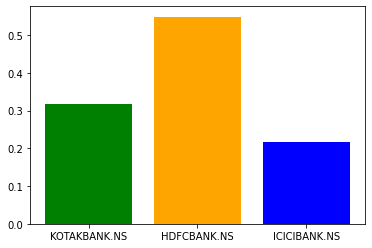

In [ ]:
#Comparison in terms of Operating Margins
plt.bar(df.index,df.operatingMargins, color=('green','orange','blue'))
plt.show()
#Inference: HDFC Bank has the highest Operating margins

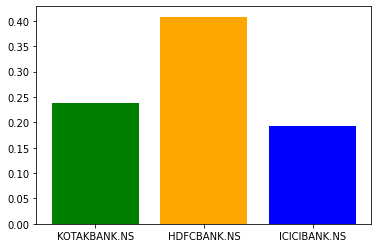

In [ ]:
#Comapriosn in terms of profit Margins
plt.bar(df.index,df.profitMargins, color=('green','orange','blue'))
plt.show()
#Inference: HDFC Bank has the highest profit margin

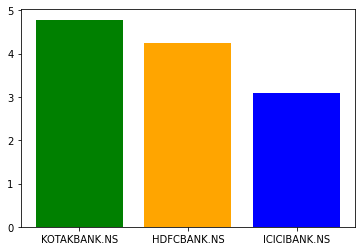

In [ ]:
#Comparison in terms of PB ratio
plt.bar(df.index,df.priceToBook, color=('green','orange','blue'))
plt.show()

#ICICI bank is the cheapest amongst these in terms of PB ratio

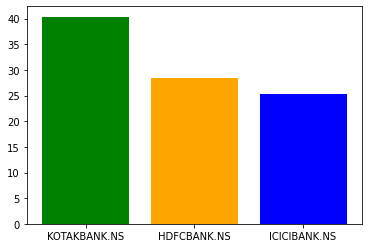

In [ ]:
#Comparison in terms of PE ratio
plt.bar(df.index,df.trailingPE, color=('green','orange','blue'))
plt.show()

#ICICI bank is the cheapest amongst these in terms of PE ratio

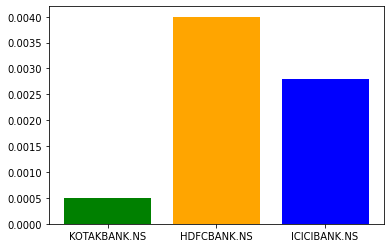

In [ ]:
#Highest Dividend Payer
plt.bar(df.index,df.dividendYield, color=('green','orange','blue'))
plt.show()

#HDFC bank is the highest dividend payer

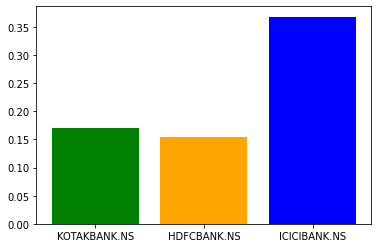

In [ ]:
#Highest Revenue Growth

plt.bar(df.index,df.revenueGrowth, color=('green','orange','blue'))
plt.show()

#ICICI Bank has the highest revenue Growth

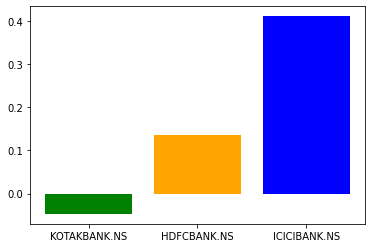

In [ ]:
#Highest earnings Growth

plt.bar(df.index,df.earningsGrowth, color=('green','orange','blue'))
plt.show()

#ICICI Bank has the highest earnings Growth

In [ ]:
#All Inferences
#Operating Margins- HDFC bank has the highest operating Margin
#profit margin: HDFC Bank has the highest profit margin
#PB ratio: ICICI bank is the cheapest amongst these in terms of PB ratio
#PE ratio: ICICI bank is the cheapest amongst these in terms of PE ratio
#dividend: HDFC bank is the highest dividend payer
#revenue Growth: ICICI Bank has the highest revenue Growth
#Earnings Growth: ICICI Bank has the highest earnings Growth


#In all for a good CAGR of 14-15% one can invest in HDFC
# For Wealth creation, one can go for ICICI as it is very undervalued. 